In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# 1 Formulate Problem


In [2]:
data=pd.read_csv('turnover.csv')

# 2 Summary statistics and visualisation

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Dependent variable is dividend: 1-pays dividend, 0-does not pay dividend.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## We see that there are missing values

In [5]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


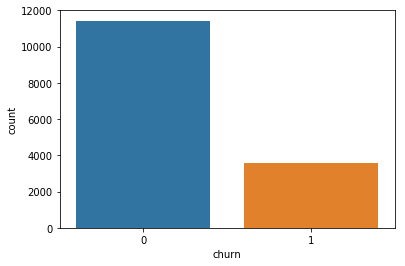

0    76.19
1    23.81
Name: churn, dtype: float64


In [6]:
sns.countplot(data.churn)
plt.show()
print((data.churn.value_counts()/len(data)*100).round(2))

In [27]:
# data.churn=data.churn.apply(lambda x:0 if x==1 else 1) if we want to change 0 and 1 

In [26]:
print((data.churn.value_counts()/len(data)*100).round(2))

0    76.19
1    23.81
Name: churn, dtype: float64


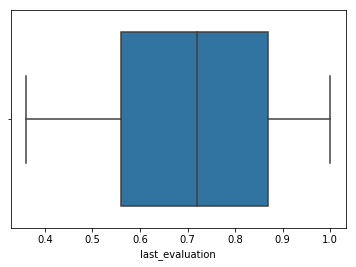

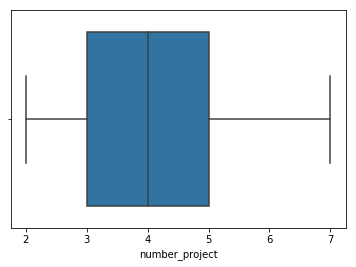

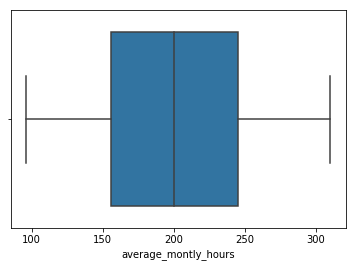

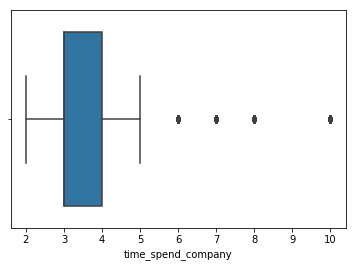

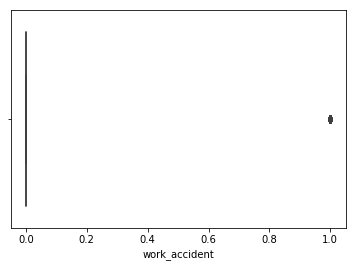

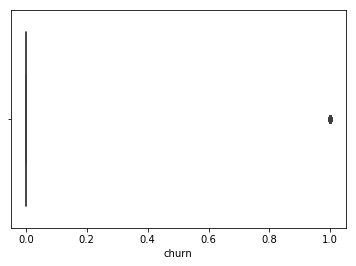

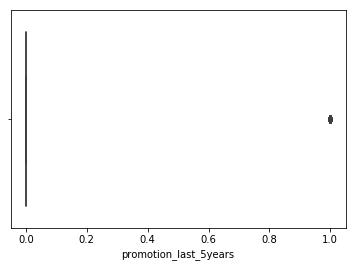

In [8]:
for i in data.iloc[:,1:8]:
    sns.boxplot(x=data[i])
    plt.show()

we have outliers

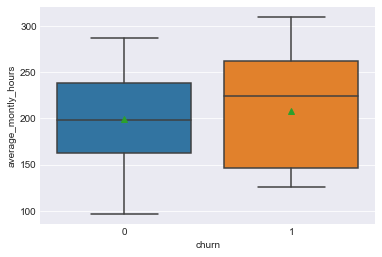

In [9]:
# let's see wheter there is difference in distribution of average of monthly income which affects on worker churn.
sns.set_style("darkgrid")
sns.boxplot(data.churn,data.average_montly_hours,showmeans=True)
plt.show()

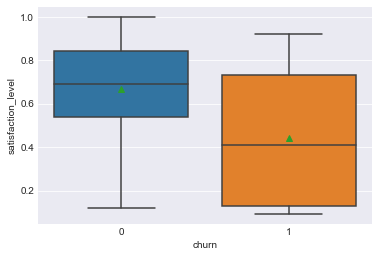

In [10]:
# let's see wheter there is difference in distribution of satisfaction level  which affects on worker churn.
sns.set_style("darkgrid")
sns.boxplot(data.churn,data.satisfaction_level,showmeans=True)
plt.show()

### We saw that in 2nd  case there is a quite visibe difference of mean and median values of satidfaction level of worker and he's churn,but which we can not say about average monthly income.

C:\Users\arman\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


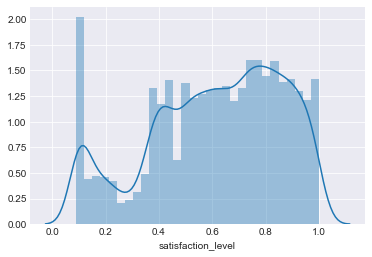

In [11]:
#plot the distribution using seaborn
sns.distplot(data.satisfaction_level)
plt.show()

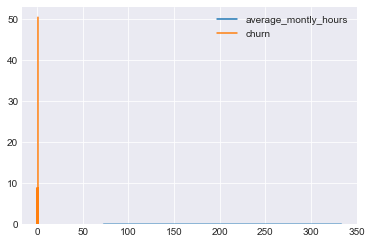

In [12]:
#kernel density estimation
for col in [data.average_montly_hours,data.churn]:
    sns.kdeplot(col, shade=True)

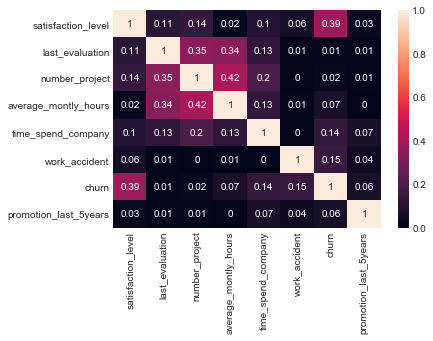

In [13]:
#Lets check for correlations
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()
#we can see that there are many correlated variables
#plt.figure(figsize=(15, 7)) 
#sns.heatmap(data_numeric.corr().abs().round(2)>0.75, annot=True)
#plt.show()

# 3 Transform data


## As we saw above that we have NAs, let's drop them.


In [14]:
#deviding into object and numeric datasets
data_object=data.select_dtypes(include="object")
data_numeric=data.select_dtypes(exclude="object")

In [15]:
#let's check number of uniques values of object variables
print([data_object[i].value_counts() for i in data_object.columns])

[sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64, low       7316
medium    6446
high      1237
Name: salary, dtype: int64]


In [16]:
#let's check for 0 variance of numeric variables
print(data_numeric.var()==0)

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
work_accident            False
churn                    False
promotion_last_5years    False
dtype: bool


In [17]:
for i in data_object.columns:
    print(data_object[i].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [71]:
# data_numeric.drop(["ID","age"],axis=1,inplace=True) if we want to drop something

In [18]:
#making object variables into dummies, join back datasets
data_dummies=pd.get_dummies(data_object,drop_first=True)
data_final=data_dummies.join(data_numeric)
X=data_final.drop("churn",axis=1)
Y=data_final.churn
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)# train-test split

#  4 Modeling


##  Lets create 3 models:

Model 1-Logistic Regression from statsmodel

Model 2-Logistic Regression from sklearn

Model 3-Decision Tree Classification

# Model 1.Logistic Regression from statsmodel

In [19]:
formula="churn~"+"+".join(X.columns)
formula

'churn~department_RandD+department_accounting+department_hr+department_management+department_marketing+department_product_mng+department_sales+department_support+department_technical+salary_low+salary_medium+satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+work_accident+promotion_last_5years'

In [20]:
model1=Logit.from_formula(formula=formula,data=data_final).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.428358
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14980
Method:                           MLE   Df Model:                           18
Date:                Thu, 29 Nov 2018   Pseudo R-squ.:                  0.2195
Time:                        23:45:10   Log-Likelihood:                -6424.9
converged:                       True   LL-Null:                       -8232.3
                                        LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.6570      0.189     -8.784      0.000      -2.027      -1.287
department_RandD          -0.4016      0.136     -2.962      0.003      -0.667      -0.136
department_accounting      0.1807      0.122      1.480      0.139      -0.059       0.420
department_hr              0.4131      0.121      3.415      0.001       0.176       0.650
department_management     -0.2677      0.152     -1.765      0.078      -0.565       0.030
department_marketing       0.1686      0.122      1.386      0.166      -0.070       0.407
department_product_mng     0.0275      0.120      0.230      0.818      -0.207       0.262
department_sales           0.1419      0.089      1.601      0.109      -0.032       0.316
department_support         0.2307      0.097      2.391      0.017       0.042       0.420
department_technical       0.2509      0.093      2.685      0.007       0.068       0.434
salary_low                 1.9441      0.129     15.111      0.000       1.692       2.196
salary_medium              1.4132      0.129     10.924      0.000       1.160       1.667
satisfaction_level        -4.1357      0.098    -42.177      0.000      -4.328      -3.944
last_evaluation            0.7309      0.149      4.899      0.000       0.439       1.023
number_project            -0.3151      0.021    -14.775      0.000      -0.357      -0.273
average_montly_hours       0.0045      0.001      8.643      0.000       0.003       0.005
time_spend_company         0.2678      0.016     17.192      0.000       0.237       0.298
work_accident             -1.5298      0.090    -17.083      0.000      -1.705      -1.354
promotion_last_5years     -1.4301      0.258     -5.552      0.000      -1.935      -0.925
==========================================================================================
"""

In [21]:
print(model1.pvalues<=0.05)

Intercept                  True
department_RandD           True
department_accounting     False
department_hr              True
department_management     False
department_marketing      False
department_product_mng    False
department_sales          False
department_support         True
department_technical       True
salary_low                 True
salary_medium              True
satisfaction_level         True
last_evaluation            True
number_project             True
average_montly_hours       True
time_spend_company         True
work_accident              True
promotion_last_5years      True
dtype: bool


In [22]:
#making summary as dataframe to manipulate easily
log_summary=pd.read_html(model1.summary().tables[1].as_html(),header=0)[0]
log_summary=log_summary.rename(columns={"Unnamed: 0":"Parameter"})
log_summary[["Parameter","coef"]][(log_summary["P>|z|"]<=0.05)] 

,Parameter,coef
0,Intercept,-1.6570
1,department_RandD,-0.4016
3,department_hr,0.4131
8,department_support,0.2307
9,department_technical,0.2509
10,salary_low,1.9441
11,salary_medium,1.4132
12,satisfaction_level,-4.1357
13,last_evaluation,0.7309
14,number_project,-0.3151


## Let's get marginal effects to be able to interpret how much each variable changes the probability of churning.

In [23]:
model1.get_margeff().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  churn
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
department_RandD          -0.0554      0.019     -2.965      0.003      -0.092      -0.019
department_accounting      0.0249      0.017      1.480      0.139      -0.008       0.058
department_hr              0.0569      0.017      3.419      0.001       0.024       0.090
department_management     -0.0369      0.021     -1.765      0.078      -0.078       0.004
department_marketing       0.0232      0.017      1.386      0.166      -0.010       0.056
department_product_mng     0.0038      0.016      0.230      0.818      -0.029       0.036
department_sales           0.0196      0.012      1.601      0.109      -0.004       0.044
department_support         0.0318      0.013      2.392      0.017       0.006       0.058
department_technical       0.0346      0.013      2.687      0.007       0.009       0.060
salary_low                 0.2679      0.017     15.426      0.000       0.234       0.302
salary_medium              0.1948      0.018     11.030      0.000       0.160       0.229
satisfaction_level        -0.5700      0.010    -54.709      0.000      -0.590      -0.550
last_evaluation            0.1007      0.021      4.911      0.000       0.061       0.141
number_project            -0.0434      0.003    -15.071      0.000      -0.049      -0.038
average_montly_hours       0.0006   7.05e-05      8.716      0.000       0.000       0.001
time_spend_company         0.0369      0.002     17.744      0.000       0.033       0.041
work_accident             -0.2108      0.012    -17.541      0.000      -0.234      -0.187
promotion_last_5years     -0.1971      0.035     -5.566      0.000      -0.267      -0.128
==========================================================================================
"""

In [24]:
marg_summary=pd.read_html(model1.get_margeff().summary().tables[1].as_html(),header=0)[0]
marg_summary=marg_summary.rename(columns={"Unnamed: 0":"Parameter"})
marg_summary[["Parameter","dy/dx"]][(marg_summary["P>|z|"]<=0.05)] 

,Parameter,dy/dx
0,department_RandD,-0.0554
2,department_hr,0.0569
7,department_support,0.0318
8,department_technical,0.0346
9,salary_low,0.2679
10,salary_medium,0.1948
11,satisfaction_level,-0.5700
12,last_evaluation,0.1007
13,number_project,-0.0434
14,average_montly_hours,0.0006


## Interpreting for categorical variable: employee having low salary has on average 26.8% higher probability to churn copared employee who has high salary.


## Interpreting for continous variable: Incremental increase in promotion last 5 years decreases the probability of being churn on average by 19.7% when other factors held constant.


# Model Fitting


In [25]:
#getting best parameters for Logit 


grid_search1=GridSearchCV(LogisticRegression(random_state=42,class_weight="balanced"),
                          param_grid={"C":np.linspace(0.0001,1,25),"penalty":["l1","l2"]},scoring="roc_auc",cv=5,n_jobs=-1)
grid_search1.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 4.17625e-02, 8.34250e-02, 1.25087e-01, 1.66750e-01,
       2.08412e-01, 2.50075e-01, 2.91737e-01, 3.33400e-01, 3.75062e-01,
       4.16725e-01, 4.58387e-01, 5.00050e-01, 5.41712e-01, 5.83375e-01,
       6.25037e-01, 6.66700e-01, 7.08363e-01, 7.50025e-01, 7.91687e-01,
       8.33350e-01, 8.75012e-01, 9.16675e-01, 9.58337e-01, 1.00000e+00]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [26]:
logit1=LogisticRegression(C=1,penalty='l2', random_state=42,class_weight="balanced")
logit1.fit(x_train,y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [30]:
# gridsearch for decision tree
gridsearch2=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid={"max_depth":(5,15),"min_samples_leaf":(20,100),
                                                                             "class_weight":["balanced"]},
                                                                scoring="roc_auc",
                                                                cv=5,n_jobs=-1).fit(X,Y)

In [32]:
print("Best parameters:",gridsearch2.best_params_)
print("Best score:",gridsearch2.best_score_.round(2)*100)

Best parameters: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 20}
Best score: 99.0


In [33]:
tree1=DecisionTreeClassifier(class_weight='balanced',random_state=42,max_depth=15,min_samples_leaf=20).fit(x_train,y_train)

# Model Evaluation


### Confusion matrix


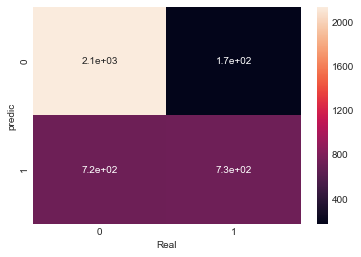

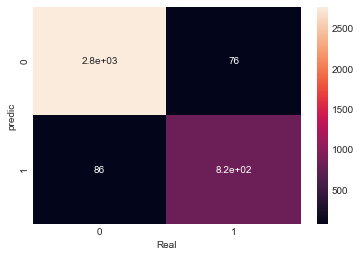

In [48]:
#let's print confusion matrix for logit and decision tree
for i in [logit1,tree1]:
    sns.heatmap(confusion_matrix(y_test,i.predict(x_test)).T,annot=True)
    plt.xlabel("Real")
    plt.ylabel("predic")
    plt.show()

## Classification report

In [49]:
for i in [logit1,tree1]:
    print(classification_report(y_test,i.predict(x_test)))

             precision    recall  f1-score   support

          0       0.93      0.75      0.83      2853
          1       0.50      0.81      0.62       897

avg / total       0.83      0.76      0.78      3750

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2853
          1       0.91      0.92      0.91       897

avg / total       0.96      0.96      0.96      3750



## Roc_AUC, Accuracy, Recall


In [50]:
#Logistic Regression
print("Train:",logit1.score(x_train,y_train).round(2)*100)
print("Test:",logit1.score(x_test,y_test).round(2)*100)
ypred1=logit1.predict(x_train)
ypred2=logit1.predict(x_test)
print('Recall for RF 1:',recall_score(y_train,ypred1).round(2)*100)
print("Recall for RF 1:",recall_score(y_test,ypred2).round(2)*100)
print('roc_auc:1',roc_auc_score(y_train,ypred1).round(2)*100)
print('roc_auc:1',roc_auc_score(y_test,ypred2).round(2)*100)


#Decision Tree
print("Train:",tree1.score(x_train,y_train).round(2)*100)
print("Test:",tree1.score(x_test,y_test).round(2)*100)
ypred3=tree1.predict(x_train)
ypred4=tree1.predict(x_test)
print('Recall for RF 1:',recall_score(y_train,ypred3).round(2)*100)
print("Recall for RF 1:",recall_score(y_test,ypred4).round(2)*100)
print('roc_auc:1',roc_auc_score(y_train,ypred3).round(2)*100)
print('roc_auc:1',roc_auc_score(y_test,ypred4).round(2)*100)

Train: 76.0
Test: 76.0
Recall for RF 1: 80.0
Recall for RF 1: 81.0
roc_auc:1 77.0
roc_auc:1 78.0
Train: 97.0
Test: 96.0
Recall for RF 1: 95.0
Recall for RF 1: 92.0
roc_auc:1 96.0
roc_auc:1 94.0


## Avereage cross validation roc_auc


In [59]:
print("Logit Avereage cross validation roc_auc:", grid_search1.best_score_)
print("Tree Avereage cross validation roc_auc:", gridsearch2.best_score_)

Logit Avereage cross validation roc_auc: 0.8042688389241673
Tree Avereage cross validation roc_auc: 0.9850817408844217


# ROC Curve


## Logit

In [61]:
FPR,TPR,tresholds=roc_curve(y_test,logit1.predict_proba(x_test)[:,1])
print(FPR,TPR,tresholds)

[0.00000000e+00 7.01016474e-04 1.75254118e-03 ... 9.97546442e-01
 9.98247459e-01 1.00000000e+00] [0. 0. 0. ... 1. 1. 1.] [1.99257891 0.99257891 0.98335521 ... 0.00600656 0.00554646 0.00302514]


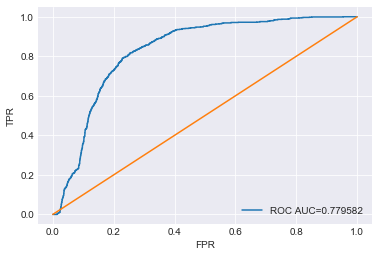

In [63]:
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,logit1.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Tree


In [65]:
roc_curve(y_test,tree1.predict_proba(x_test)[:,1])


(array([0.        , 0.00210305, 0.00210305, 0.00210305, 0.00245356,
        0.00245356, 0.00245356, 0.00245356, 0.00350508, 0.00385559,
        0.00385559, 0.00455661, 0.00560813, 0.00876271, 0.01226779,
        0.01472135, 0.01927795, 0.02103049, 0.02418507, 0.0255871 ,
        0.02733964, 0.03014371, 0.03470032, 0.03680336, 0.04135997,
        0.04486505, 0.05012268, 0.05467928, 0.05678233, 0.05993691,
        0.0637925 , 0.06834911, 0.07115317, 0.07500876, 0.07746232,
        0.08552401, 0.09008062, 0.09183316, 0.09638977, 0.1019979 ,
        0.10830705, 0.11216264, 0.11671924, 0.12022433, 0.12267788,
        0.12478093, 0.12968805, 0.13739923, 0.14125482, 0.1447599 ,
        0.14791448, 0.15352261, 0.15807921, 0.1615843 , 0.16438836,
        0.16824395, 0.16929548, 0.17245005, 0.17735717, 0.18611987,
        0.21731511, 1.        ]),
 array([0.        , 0.82051282, 0.82831661, 0.84280936, 0.84503902,
        0.85841695, 0.86956522, 0.87848384, 0.88182832, 0.89520624,
        0.8996

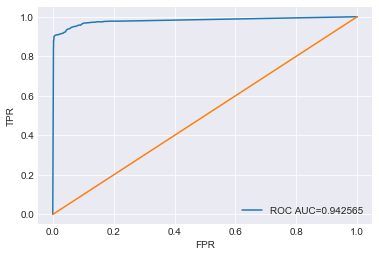

In [67]:
FPR1,TPR1,tresholds1=roc_curve(y_test,tree1.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(FPR1,TPR1,label="ROC AUC=%f"%roc_auc_score(y_test,tree1.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Important features of tree


In [69]:
imp=pd.DataFrame(data=tree1.feature_importances_,index=X.columns,columns=['importances'])
imp.sort_values(by="importances",ascending=False)

,importances
satisfaction_level,0.463272
time_spend_company,0.352816
last_evaluation,0.111163
average_montly_hours,0.045375
number_project,0.018171
department_technical,0.003360
salary_low,0.002430
department_hr,0.001371
work_accident,0.001018
salary_medium,0.000652


#### we can drop those variables which has low  importance

## Model Selection


### As we can see from the model evaluation, the decision tree performs better so we will choose tree.


# PLS

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 

In [ ]:
data=data.dropna()


In [ ]:
#we can see that there are many correlated variables
plt.figure(figsize=(9, 7)) #make the graph bigger
sns.heatmap(data_numeric.corr().abs().round(2), annot=True)
plt.show()

In [ ]:
data_dummy = pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)
data = data_numeric.join(data_dummy)
#let's define what are our X and Y variables
Y=data.price
X=scale(data.drop(columns="price")) #we should normalize (scale) the X data befor running pls
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
#run pls model, we define the number of latent variables we want to keep in the model
pls = PLSRegression(14)
pls=pls.fit(x_train,y_train)
#let's use the model to do prediction for test data
pred=pls.predict(x_test)
#R-square
pls_r2=pls.score(x_test,y_test)
print(pls_r2)
#this gives all coefs per all 58 X variables
coef=pd.DataFrame(pls.coef_)
coef.head()
#scores of latent variables
sc=pd.DataFrame(pls.x_scores_)
sc.head(10)

# we want to calculate how much of the variance of all X variables is explained by each latent variable

#first we need to calculate the variance for each latent variable created
var_xcores=np.var(pls.x_scores_,axis=0)
print(var_xcores)
#second, lets calculate total variance of all X variables
total_var=np.sum(np.var(x_train,axis=0))
print(total_var)
#calculate the proportioan of total X variance explained by each latent variable
X_Variance=pd.DataFrame((var_xcores/total_var).round(3), columns={"X_Variance"}).reset_index()
#let's keep X_variance i=and cummulative X_Variance as dataframe
X_Variance = X_Variance.rename(columns={'index': 'Latent_Factors'})
X_Variance['Cummulative_X_Variance'] = X_Variance['X_Variance'].cumsum().round(3) #calculates cummulative variance
print(X_Variance)
#we want to see visually from which latent variable the variance changes very slightly
plt.plot(X_Variance.Latent_Factors,X_Variance.Cummulative_X_Variance)
plt.show()
